In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [7]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [8]:
coverage_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,0.428571,0.875000,0.571429,0.833333,1.000000,0.714286
1,1.000000,1.000000,1.000000,1.000000,1.000000,0.857143
2,1.000000,0.875000,0.875000,1.000000,0.875000,0.750000
3,0.857143,0.714286,0.833333,0.833333,0.857143,0.714286
4,0.714286,0.833333,0.833333,0.857143,1.000000,0.714286
...,...,...,...,...,...,...
15,0.875000,0.833333,1.000000,0.833333,0.857143,0.714286
16,1.000000,1.000000,1.000000,1.000000,1.000000,0.857143
17,0.857143,1.000000,0.666667,1.000000,1.000000,0.875000
18,1.000000,1.000000,0.857143,0.625000,0.857143,0.571429


In [9]:
length_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,2.030871,1.690999,1.331242,1.280870,6.342434,1.304685
1,2.241404,1.468891,2.672788,1.269574,6.811211,1.343289
2,2.356787,1.550430,1.881525,2.969773,9.891397,1.359505
3,3.697378,1.544692,1.368696,1.423892,24.798855,1.284726
4,2.326487,1.416216,1.272952,1.498750,19.860405,1.394762
...,...,...,...,...,...,...
15,2.314240,1.361702,1.464056,1.266898,17.187252,1.313018
16,2.196554,1.559234,1.518124,1.391458,8.044607,1.263506
17,1.920390,1.773625,1.300585,1.366741,11.575162,1.365924
18,2.221125,1.622912,1.819132,1.726673,23.419654,1.348297


In [10]:
MSE_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,4.307969,3.852141,4.657936,5.731547,4.261315,4.261315
1,5.112615,5.453622,6.142654,5.926865,5.193406,5.193406
2,4.895395,5.552223,5.595390,5.466613,5.289303,5.289303
3,5.137774,5.309226,4.924117,5.778484,4.774878,4.774878
4,4.098191,4.746343,5.106854,5.259051,4.234560,4.234560
...,...,...,...,...,...,...
15,5.105217,4.843799,5.459045,5.385586,4.989380,4.989380
16,4.265836,4.586644,4.510912,5.400546,4.015300,4.015300
17,4.818017,5.172481,5.092200,5.982632,5.199505,5.199505
18,4.879363,4.535783,4.623404,5.119196,4.660680,4.660680


In [11]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            if len_baseline_key:
                axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(0,MSE_lim)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 1.0         0.905450
2.5         0.883674
5.0         0.859506
10.0        0.881527
Tree val    0.940416
Naive       0.650006
dtype: float64
Length :
 1.0          2.483346
2.5          2.030366
5.0          2.057912
10.0         2.281273
Tree val    25.657145
Naive        1.307722
dtype: float64
MSE :
 1.0         4.655641
2.5         4.862009
5.0         5.072209
10.0        5.402918
Tree val    4.640754
Naive       4.640754
dtype: float64


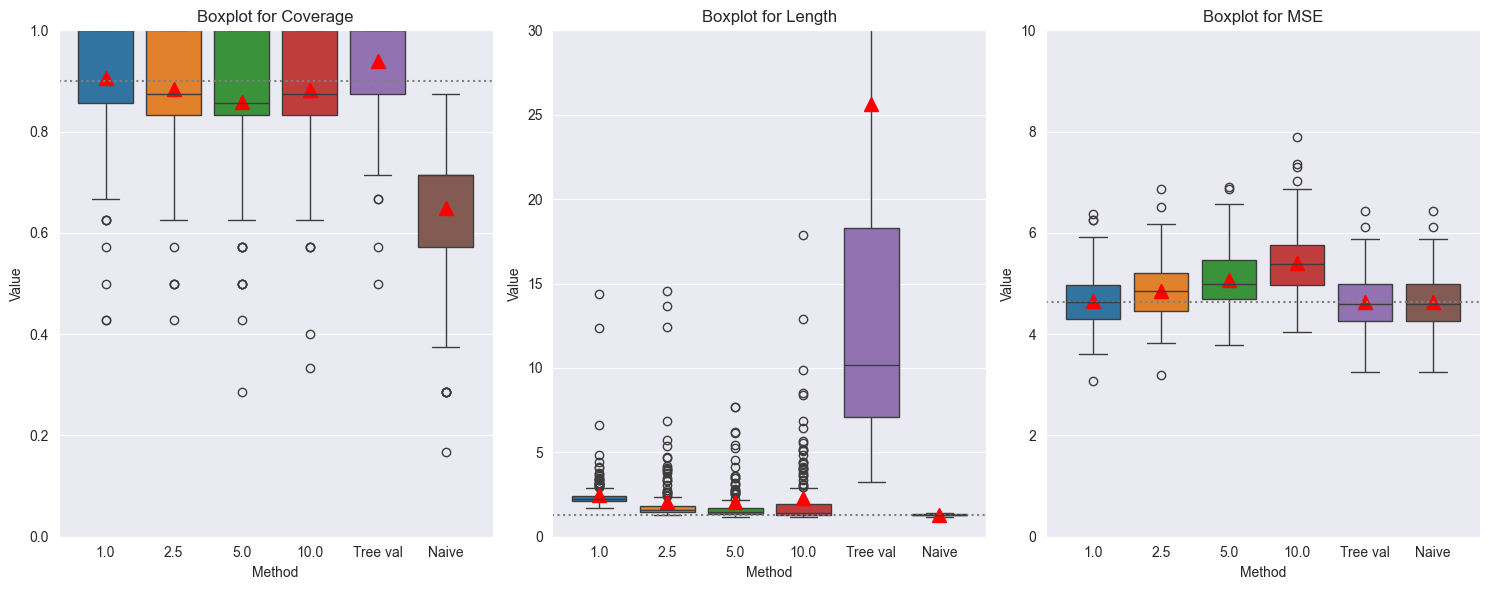

In [12]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=30,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"])

In [ ]:
# TODO: Case 1 with 1, 5, 10